# DS-SF-27 | Codealong 03 | Exploratory Data Analysis

In [1]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

/Users/rachelkr/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Part A - Review and Activity | Subsetting with pandas

In [2]:
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Carol', 'Dave', 'Eve', 'Frank'],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'age': [24, 34, 44, 41, 52, 43],
    'marital_status': [0, 2, 1, 2, 0, 1]}).\
        set_index('name')

In [6]:
df

,age,gender,marital_status
name,,,
Alice,24,Female,0
Bob,34,Male,2
Carol,44,Female,1
Dave,41,Male,2
Eve,52,Female,0
Frank,43,Male,1


> Question 1.  Subset the dataframe on the age and gender columns

In [7]:
df[['age','gender']]

,age,gender
name,,
Alice,24,Female
Bob,34,Male
Carol,44,Female
Dave,41,Male
Eve,52,Female
Frank,43,Male


> Question 2.  Subset the dataframe on the age column alone, first as a `DataFrame`, then as a `Series`

In [13]:
df[['age']]

,age
name,
Alice,24
Bob,34
Carol,44
Dave,41
Eve,52
Frank,43


In [12]:
df.age

name
Alice    24
Bob      34
Carol    44
Dave     41
Eve      52
Frank    43
Name: age, dtype: int64

> Question 3.  Subset the dataframe on the rows Bob and Carol

In [14]:
df.loc[['Bob', 'Carol']]

,age,gender,marital_status
name,,,
Bob,34,Male,2
Carol,44,Female,1


> Question 4.  Subset the dataframe on the row Eve alone, first as a `DataFrame`, then as a `Series`

In [15]:
df.loc[['Eve']]

,age,gender,marital_status
name,,,
Eve,52,Female,0


In [19]:
df.loc['Eve']

age                   52
gender            Female
marital_status         0
Name: Eve, dtype: object

> Question 5.  How old is Frank?

In [25]:
df.at['Frank','age']

43

## Part B

- `.mean()`
- `.var()`, `.std()`

In [26]:
df = pd.read_csv(os.path.join('..', 'datasets', 'zillow-03-starter.csv'), index_col = 'ID')

In [27]:
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,710000.0,0.0,1.0,NaN,550.0,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2150000.0,0.0,NaN,2.0,1430.0,2435.0,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5600000.0,0.0,2.0,3.5,2040.0,3920.0,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1500000.0,0.0,1.0,1.0,1060.0,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,970000.0,0.0,2.0,2.0,1299.0,NaN,1993.0
15064295,"111 Chestnut St APT 702, San Francisco, CA",12/17/15,940000.0,0.0,2.0,2.0,1033.0,NaN,1993.0
15064391,"1821 Grant Ave APT 101, San Francisco, CA",12/15/15,835000.0,0.0,1.0,1.0,1048.0,NaN,1975.0
15064536,"2300 Leavenworth St, San Francisco, CA",12/4/15,2830000.0,0.0,3.0,2.0,2115.0,1271.0,1913.0
15064640,"1047-1049 Lombard St, San Francisco, CA",1/14/16,4050000.0,1.0,NaN,NaN,4102.0,3049.0,1948.0


### `Series.mean()` - Compute the `Series` mean value

In [37]:
df.SalePrice.mean()

1397422.943

> What's `Size`'s mean?

In [38]:
df.Size.mean()

1641.3009307135471

> What's fraction of the properties sold in the dataset are studios?

In [60]:
#1. * len(df[df.IsAStudio > 0])/df.shape[0]
#df.isnull().sum().sum()
df[(df.IsAStudio > 0)]

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15064640,"1047-1049 Lombard St, San Francisco, CA",1/14/16,4050000.0,1.0,NaN,NaN,4102.0,3049.0,1948.0
15066959,"1300 Pacific Ave, San Francisco, CA",1/14/16,425000.0,1.0,NaN,2.0,989.0,NaN,1910.0
15068580,"1177 California St APT 423, San Francisco, CA",12/29/15,738000.0,1.0,NaN,1.0,706.0,NaN,1978.0
15068857,"1001 Pine St APT 608, San Francisco, CA",12/7/15,535000.0,1.0,NaN,1.0,450.0,NaN,1964.0
15069477,"631 Ofarrell St APT 816, San Francisco, CA",12/18/15,485000.0,1.0,NaN,1.0,480.0,NaN,1930.0
15077111,"1200 Gough St APT 22B, San Francisco, CA",1/29/16,650000.0,1.0,NaN,1.0,550.0,NaN,1966.0
15079314,"457-461 Waller St, San Francisco, CA",12/22/15,1550000.0,1.0,NaN,NaN,3750.0,3000.0,1900.0
15094548,"528 2nd Ave, San Francisco, CA",11/25/15,1450000.0,1.0,NaN,NaN,2810.0,3049.0,1906.0
15101927,"1271 21st Ave, San Francisco, CA",1/4/16,1850000.0,1.0,NaN,NaN,3170.0,3001.0,1983.0


In [54]:
df.IsAStudio.sum()

29.0

In [61]:
len(df[df.IsAStudio > 0])

29

In [63]:
#df.IsAStudio.isnull().sum() same as below
df.IsAStudio.shape[0] - df.IsAStudio.count()

14

### `DataFrame.mean()` - Compute the `DataFrame` mean value

In [64]:
df.mean()

SalePrice      1.397423e+06
IsAStudio      2.941176e-02
BedCount       2.572967e+00
BathCount      1.977548e+00
Size           1.641301e+03
LotSize        3.020640e+03
BuiltInYear    1.947533e+03
dtype: float64

In [ ]:
# TODO

### `.var()` - Compute the unbiased variance (normalized by `N-1` by default)

In [67]:
#df.var()
df.std()

SalePrice      1.736413e+06
IsAStudio      1.690435e-01
BedCount       1.250891e+00
BathCount      1.130334e+00
Size           1.027016e+03
LotSize        2.853430e+03
BuiltInYear    3.802156e+01
dtype: float64

> What's the variance for the number of beds in the dataset?

In [71]:
df.BedCount.var()

1.5647293928888621

### `.std()` - Compute the unbiased standard deviation (normalized by `N-1` by default)

> What's the standard deviation for the number of beds in the dataset?

In [ ]:
# TODO

## Part C

- `.median()`
- `.count()`, `.dropna()`, `.isnull()`
- `.min()`, `.max()`
- `.quantile()`
- `.describe()`

### `.median()` - Compute the median value

In [74]:
# TODO
df.median()

SalePrice      1100000.0
IsAStudio            0.0
BedCount             2.0
BathCount            2.0
Size              1350.0
LotSize           2622.0
BuiltInYear       1939.0
dtype: float64

> What's the median sale price for properties in the dataset?

In [75]:
# TODO
df.SalePrice.median()

1100000.0

### `.count()` - Compute the number of rows/observations without `NaN` and `.sum()` - Compute the sum of the values

In [76]:
df.count()

Address        1000
DateOfSale     1000
SalePrice      1000
IsAStudio       986
BedCount        836
BathCount       942
Size            967
LotSize         556
BuiltInYear     975
dtype: int64

In [77]:
df.IsAStudio.count()

986

`count()` counts the number of non-`NaN` values:

In [78]:
df.IsAStudio.dropna().shape[0]

986

In [79]:
df.IsAStudio.isnull().sum()

14

Which leaves 14 houses for which we don't know if they are studios or not.

In [80]:
df.IsAStudio.dropna().shape[0] + df.IsAStudio.isnull().sum()

1000

In [81]:
df.IsAStudio.sum()

29.0

29 properties are studios.

### `.min()` and `.max()` - Compute the minimum and maximum values

In [82]:
df.min()

Address        1 Crescent Way APT 1402, San Francisco, CA
DateOfSale                                        1/10/16
SalePrice                                               1
IsAStudio                                               0
BedCount                                                1
BathCount                                               1
Size                                                  264
LotSize                                                44
BuiltInYear                                          1870
dtype: object

> What are properties that were sold at the lowest price?  At what price?

In [83]:
# TODO
df[df.SalePrice == 1]

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15149005,"251-253 Missouri St, San Francisco, CA",12/23/15,1.0,0.0,7.0,6.0,2904.0,2482.0,1900.0


In [84]:
df.max()

Address        San Carlos St, Carmel, CA
DateOfSale                        2/9/16
SalePrice                       3.27e+07
IsAStudio                              1
BedCount                               9
BathCount                             14
Size                               11500
LotSize                            47916
BuiltInYear                         2015
dtype: object

> What are properties that were sold at the highest price?  At what price?

In [85]:
df[df.SalePrice > 30000000]

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15083161,"1825 Scott St, San Francisco, CA",11/23/15,32700000.0,0.0,NaN,1.0,1100.0,1694.0,1900.0


### `.quantile()` - Compute values at the given quantile

In [86]:
df.quantile(.5)

/Users/rachelkr/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


SalePrice      1100000.0
IsAStudio            NaN
BedCount             NaN
BathCount            NaN
Size                 NaN
LotSize              NaN
BuiltInYear          NaN
dtype: float64

In [87]:
df.median()

SalePrice      1100000.0
IsAStudio            0.0
BedCount             2.0
BathCount            2.0
Size              1350.0
LotSize           2622.0
BuiltInYear       1939.0
dtype: float64

In [88]:
df.quantile(.25)

SalePrice      800000.0
IsAStudio           NaN
BedCount            NaN
BathCount           NaN
Size                NaN
LotSize             NaN
BuiltInYear         NaN
dtype: float64

In [89]:
df.quantile(.75)

SalePrice      1532500.0
IsAStudio            NaN
BedCount             NaN
BathCount            NaN
Size                 NaN
LotSize              NaN
BuiltInYear          NaN
dtype: float64

### `.describe()` - Generate various summary statistics

In [90]:
df.describe()

,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
count,1.000000e+03,986.000000,836.000000,942.000000,967.000000,556.000000,975.000000
mean,1.397423e+06,0.029412,2.572967,1.977548,1641.300931,3020.640288,1947.533333
std,1.736413e+06,0.169043,1.250891,1.130334,1027.016175,2853.430139,38.021563
min,1.000000e+00,0.000000,1.000000,1.000000,264.000000,44.000000,1870.000000
25%,8.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.100000e+06,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.532500e+06,NaN,NaN,NaN,NaN,NaN,NaN
max,3.270000e+07,1.000000,9.000000,14.000000,11500.000000,47916.000000,2015.000000


In [91]:
df.SalePrice.describe()

count    1.000000e+03
mean     1.397423e+06
std      1.736413e+06
min      1.000000e+00
25%      8.000000e+05
50%      1.100000e+06
75%      1.532500e+06
max      3.270000e+07
Name: SalePrice, dtype: float64

## Part D

- Boxplots

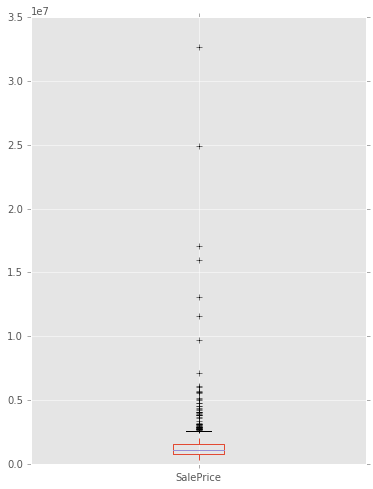

In [93]:
df.SalePrice.plot(kind = 'box', figsize = (6, 8))

> In the same plot, plot the boxplots of `BedCount` and `BathCount`

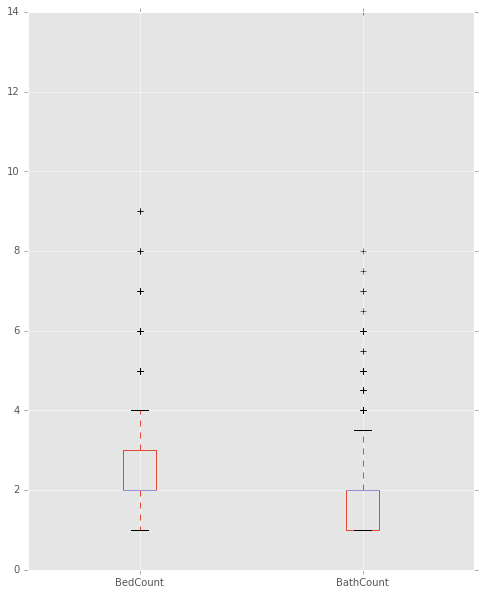

In [99]:
# TODO
df[['BedCount', 'BathCount']].plot(kind = 'box', figsize = (8, 10))


## Part E

- Histograms

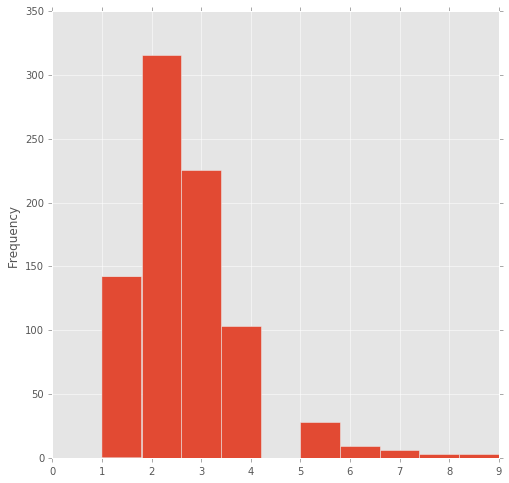

In [102]:
df.BedCount.plot(kind = 'hist', figsize = (8, 8))

> In the same plot, plot the histograms of `BedCount` and `BathCount`

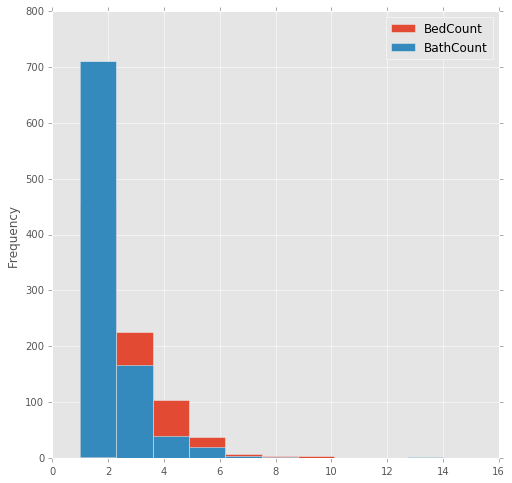

In [103]:
df[['BedCount', 'BathCount']].plot(kind = 'hist', figsize = (8, 8))

## Part F

- `.mode()`

### `.mode()` - Compute the mode value(s)

In [104]:
df.mode()

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
0,"1 Mono St # B, San Francisco, CA",11/20/15,1100000.0,0.0,2.0,1.0,1000.0,2495.0,1900.0
1,"150 Grand View Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1915 Diamond St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1954 Golden Gate Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"2299 Market St APT 502, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"643 Natoma St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"829 Folsom St UNIT 906, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html): Gets the mode(s) of each element along the columns.  Empty if nothing has 2+ occurrences. Adds a row for each mode per label, fills in gaps with `NaN`.  Note that there could be multiple values returned in the columns (when more than one value share the maximum frequency), which is the reason why a dataframe is returned.

In [105]:
df.Address[df.Address == '1 Mono St # B, San Francisco, CA']

ID
59700333    1 Mono St # B, San Francisco, CA
59779608    1 Mono St # B, San Francisco, CA
Name: Address, dtype: object

In [109]:
#df.Address[df.Address == '829 Folsom St UNIT 906, San Francisco, CA']
df[df.Address == '829 Folsom St UNIT 906, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
123597964,"829 Folsom St UNIT 906, San Francisco, CA",12/7/15,675000.0,0.0,NaN,NaN,557.0,NaN,2010.0
2121978635,"829 Folsom St UNIT 906, San Francisco, CA",12/6/15,675000.0,0.0,1.0,1.0,557.0,NaN,2010.0


In [110]:
#df[df.DateOfSale == '11/20/15'].shape[0]
df[df.DateOfSale == '11/20/15']

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15072263,"1795 Green St, San Francisco, CA",11/20/15,2500000.0,0.0,3.0,2.0,1647.0,NaN,1908.0
15073657,"1895 Pacific Ave APT 506, San Francisco, CA",11/20/15,975000.0,0.0,1.0,1.0,1165.0,NaN,1931.0
15084143,"270 Ewing Ter, San Francisco, CA",11/20/15,1570000.0,0.0,2.0,1.0,1250.0,2178.0,1940.0
15093664,"591 29th Ave, San Francisco, CA",11/20/15,1750000.0,0.0,3.0,2.5,1800.0,1875.0,1936.0
15100149,"806 39th Ave, San Francisco, CA",11/20/15,1050000.0,0.0,NaN,1.0,1375.0,2374.0,1926.0
15104379,"1466 44th Ave, San Francisco, CA",11/20/15,892000.0,0.0,2.0,1.0,1130.0,3049.0,1926.0
15104496,"1422 42nd Ave, San Francisco, CA",11/20/15,1220000.0,0.0,3.0,1.0,1325.0,2996.0,1951.0
15118458,"2279 47th Ave, San Francisco, CA",11/20/15,1030000.0,0.0,4.0,3.0,2570.0,2996.0,1900.0
15124103,"2514 40th Ave, San Francisco, CA",11/20/15,1020000.0,0.0,3.0,2.0,1490.0,3049.0,1945.0


In [108]:
(df.DateOfSale == '11/20/15').sum()

47

## Part G

- `.corr()`
- Heatmaps
- Scatter plots
- Scatter matrices

In [111]:
df.corr()

,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258
BedCount,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700
BathCount,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989
LotSize,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000


### Heatmaps

In [112]:
corr = df.corr()

corr

,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258
BedCount,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700
BathCount,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989
LotSize,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000


In [ ]:
# TODO

Let's pretty this up.

In [113]:
list(corr.columns)

['SalePrice',
 'IsAStudio',
 'BedCount',
 'BathCount',
 'Size',
 'LotSize',
 'BuiltInYear']

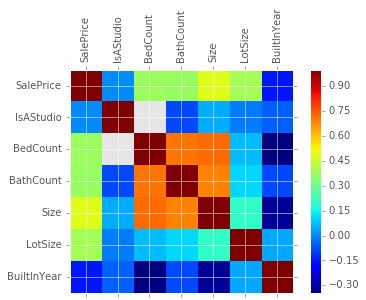

In [114]:
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

### Scatter plots

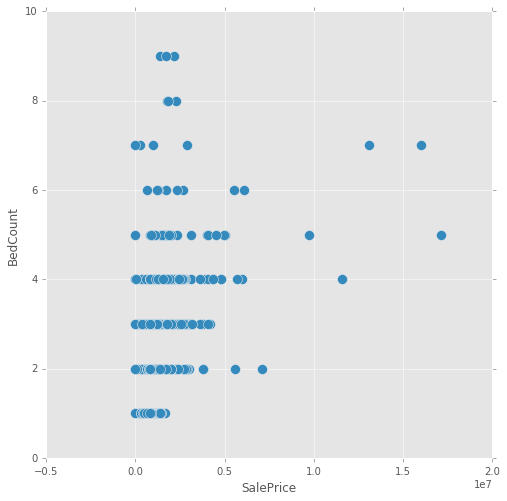

In [118]:
df[ ['SalePrice', 'BedCount'] ].plot(kind = 'scatter', x = 'SalePrice', y = 'BedCount', s = 100, figsize = (8, 8))

### Scatter matrices

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b124d90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b49b650>]], dtype=object)

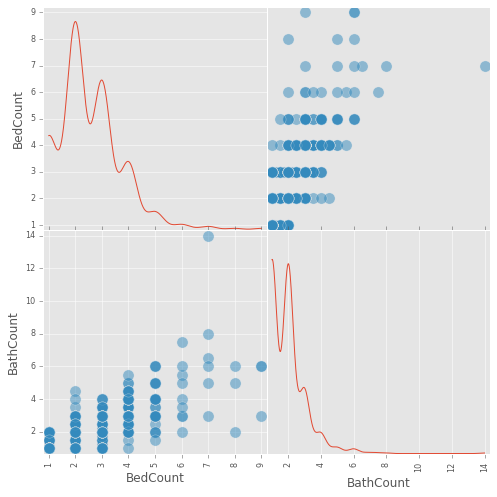

In [119]:
pd.tools.plotting.scatter_matrix(df[ ['BedCount', 'BathCount'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dbb17d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11dfa80d0>]], dtype=object)

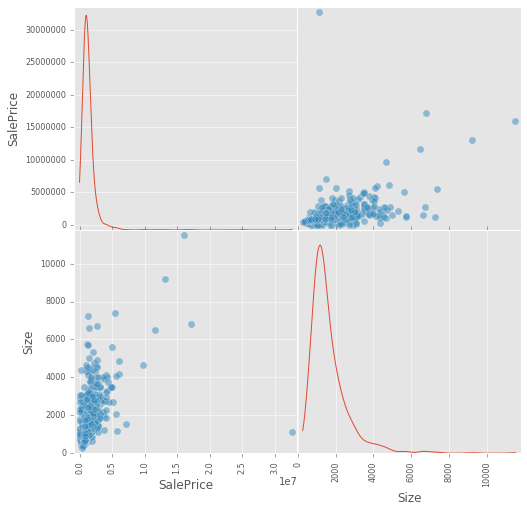

In [121]:
pd.tools.plotting.scatter_matrix(df[ ['SalePrice', 'Size'] ], diagonal = 'kde', s = 200, figsize = (8, 8))

## Part H

- `.value_counts()`
- `.crosstab()`

> Reproduce the `BedCount` histogram above.  For each possible bed count, how many properties share that bed count?

In [123]:
df.BedCount.unique()
#df.BedCount.unique would just be a series, the parentheses makes it a dataframe

array([  1.,  nan,   2.,   3.,   5.,   4.,   7.,   6.,   8.,   9.])

> Careful on checking for `NaN` values!

In [137]:
#df.BedCount.value_counts(dropna = False)
df.BedCount.value_counts(dropna = False, sort = False)

NaN     164
 1.0    142
 2.0    316
 3.0    226
 4.0    103
 5.0     28
 6.0      9
 7.0      6
 8.0      3
 9.0      3
Name: BedCount, dtype: int64

In [130]:
pd.isnull(a)

True

False

> Create a frequency table for `BathCount` over `BedCount`.

In [136]:
pd.crosstab(df.BedCount, df.BathCount)
#pd.crosstab([df.BedCount, df.BathCount], [df.Size, df.LotSize])

BathCount,1.0,1.1,1.25,1.5,1.75,...,6.0,6.5,7.5,8.0,14.0
BedCount,,,,,,,,,,,
1.0,116,1,0,7,0,...,0,0,0,0,0
2.0,133,0,0,19,0,...,0,0,0,0,0
3.0,39,0,1,9,1,...,0,0,0,0,0
4.0,1,0,0,1,0,...,0,0,0,0,0
5.0,0,0,0,1,0,...,3,0,0,0,0
6.0,0,0,0,0,0,...,1,0,1,0,0
7.0,0,0,0,0,0,...,1,1,0,1,1
8.0,0,0,0,0,0,...,1,0,0,0,0
9.0,0,0,0,0,0,...,2,0,0,0,0
